### Cluster-wise rice yield vs. NPK fertilizer consumption per area

Let us recap the work done so far. Firstly, we cleaned and merged district-level annual data from several ICRISAT databases into a single collection. Our resulting data set [`rice_yield.csv`](https://github.com/akshaysuresh1/may22-barrel/blob/main/Final_data/rice_yield.csv) contains the following data columns.

`Dist Code`: District code <br>
`Year`: Year <br>
`Dist Name`: District name <br>
`State Name`: State name <br>
`RICE AREA (1000 ha)`: Gross cropped area of rice in units of 1000 hectares <br>
`RICE YIELD (kg per ha)`: Rice yield (kg/ha) <br>
`nitrogen`: tonnes of nitogen fertilizer used <br>
`phosphate`: tonnes of phosphate fertilizer used <br>
`potash`: tonnes of potash fertilizer used <br>
`prec_grow`: Average monthly precipitation (mm) during growing season <br>
`prec_harvest`: Average monthly precipitation (mm) during harvesting season <br>
`et_grow`: Average monthly evapotranspiration (mm) during growing season <br>
`et_harvest`: Average monthly evapotranspiration (mm) during harvesting season <br>
`maxT_grow`: Average of monthly maximum temperatures (celsius) during growing season <br>
`maxT_harvest`: Average of monthly maximum temperatures (celsius) during harvesting season <br>
`minT_grow`: Average of monthly minimum temperatures (celsius) during growing season <br>
`minT_harvest`: Average of monthly minimum temperatures (celsius) during harvesting season <br>
`runoff_grow`: Mean surface runoff (mm) during growing season <br>
`runoff_harvest`: Mean surface runoff (mm) during harvesting season <br>
`windspeed_grow`: Mean wind speed (m/s) during growing season <br>
`windspeed_harvest`: Mean wind speed (m/s) during harvesting season <br>
`RICE IRRIGATED AREA (1000 ha)`: Rice-irrigated area in units of 1000 hectares <br>
`RA-IA`: Difference between cropped area and irrigated area of rice (1000 hecatres) <br>

Based on our exploratory analysis, we selected a subset of environmental parameters (`prec_grow`, `prec_harvest`, `maxT_grow`, `maxT_harvest`, `minT_grow`, `minT_harvest`, `et_grow`, `et_harvest`, `windspeed_grow` and `windspeed_harvest`) and their mutual correlations to group  districts into "clusters." The underlying principle here is that districts within the same cluster share similiar environments for rice cultivation. <br>

Here, we will explore the impact of fertilizer consumption per unit cropped area on annual rice yield for each cluster. Note that policy makers are interested in the reverse problem, i.e., the mass of fertilizer required to obtain a certain yield of rice. <br>

In [1]:
# Load relevant packages.
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# Load clustered data.
df = pd.read_csv('../Final_data/rice_yield_clusters.csv')

In [3]:
# Load shapefile of Indian districts.
shp = gpd.read_file('../Final_data/districts2020_clusters.shp')

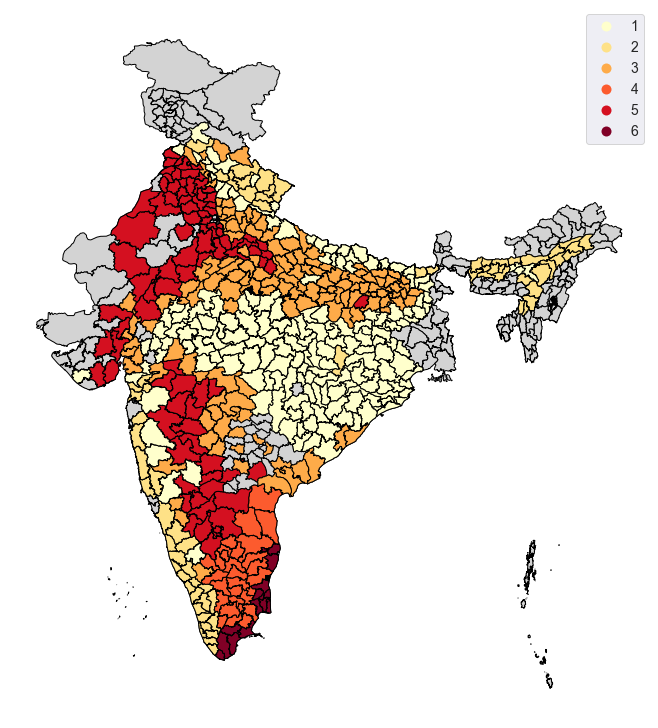

In [4]:
# Visualize spatial distribution of clusters.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
shp.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=False, categorical=True, 
        missing_kwds={'color': 'lightgrey'})
# Show map without NaNs.
noNaNs = shp.dropna().copy()
noNaNs.cluster = noNaNs.cluster.astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14) 
noNaNs.plot(ax=ax, column='cluster', edgecolor='black', cmap='YlOrRd', legend=True, categorical=True,
                  legend_kwds=legend_kwds)
# Hide axes.
ax.set_axis_off()
plt.show()

In the above map, we have a total of 6 clusters. Each color corresponds to a different cluster number. Grey areas represent districts with missing or insufficient data.

To start off, let's convert fertilizer consumption to units of kg/ha.

In [5]:
# Compute fertilizer consumption per unit area.
df['N_per_area'] = df['nitrogen']/df['RICE.AREA..1000.ha.']
df['P_per_area'] = df['phosphate']/df['RICE.AREA..1000.ha.']
df['K_per_area'] = df['potash']/df['RICE.AREA..1000.ha.']

###  Rice yield vs. fertilizer consumption per unit area

In [6]:
N_clusters = df['Cluster'].max()


Plotting for cluster 1
No. of samples in cluster 1 = 3410


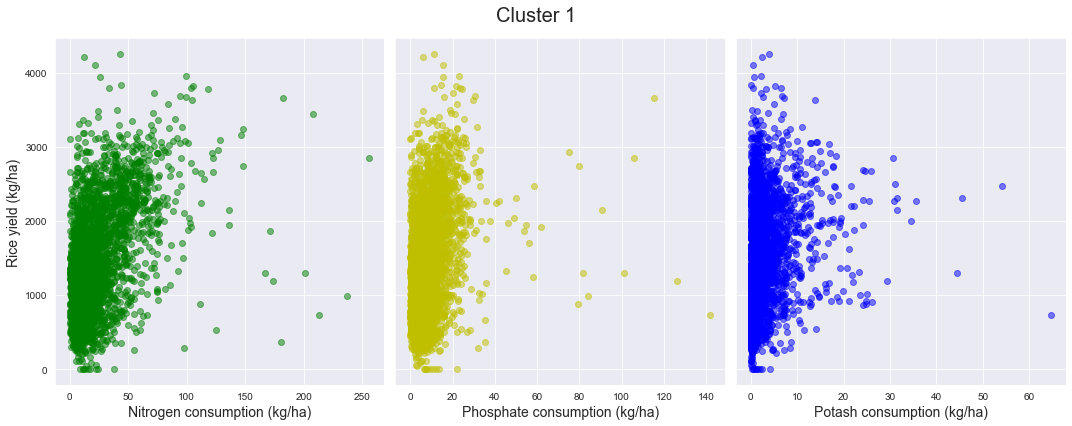


Plotting for cluster 2
No. of samples in cluster 2 = 1266


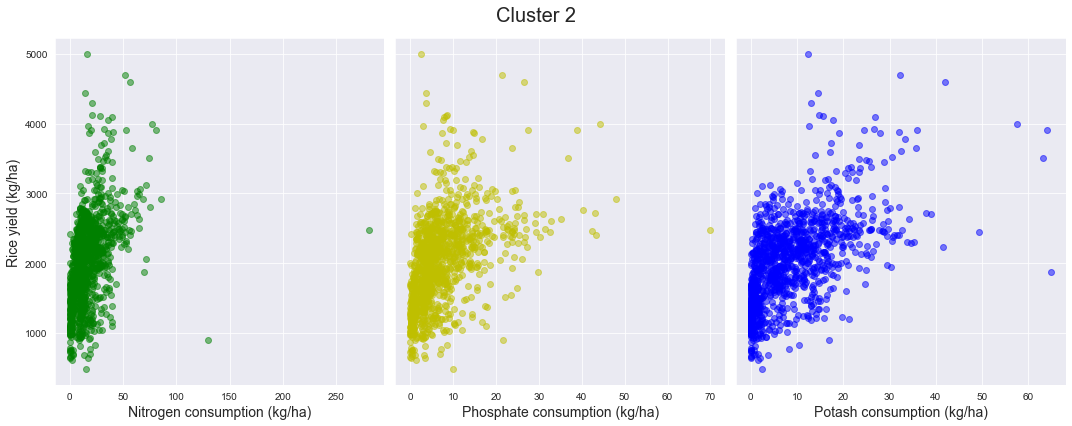


Plotting for cluster 3
No. of samples in cluster 3 = 3077


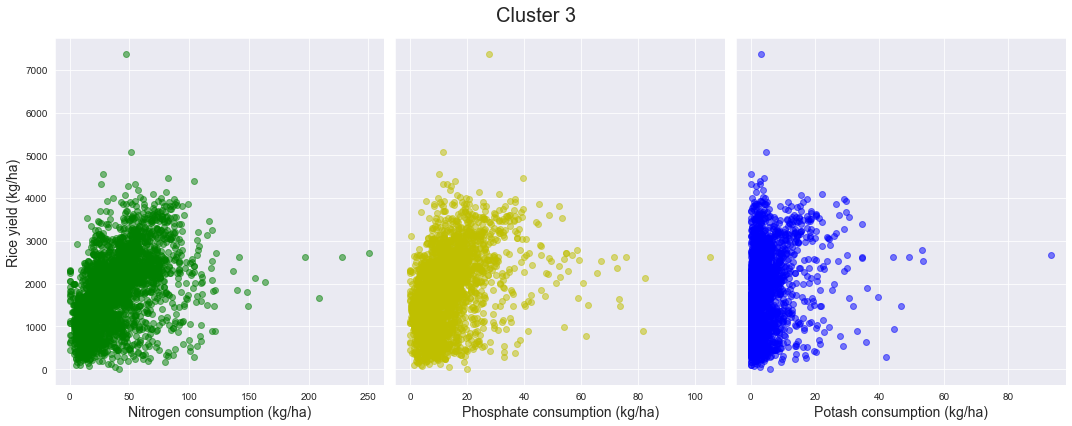


Plotting for cluster 4
No. of samples in cluster 4 = 624


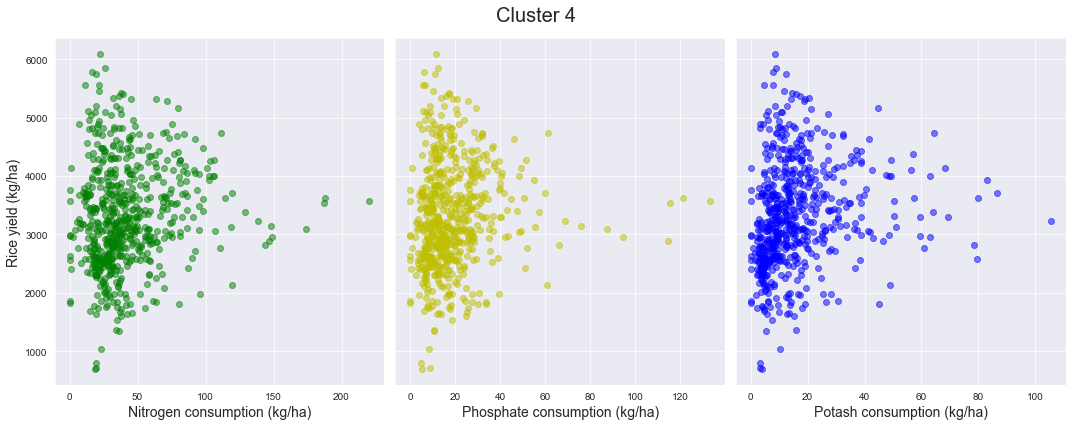


Plotting for cluster 5
No. of samples in cluster 5 = 1823


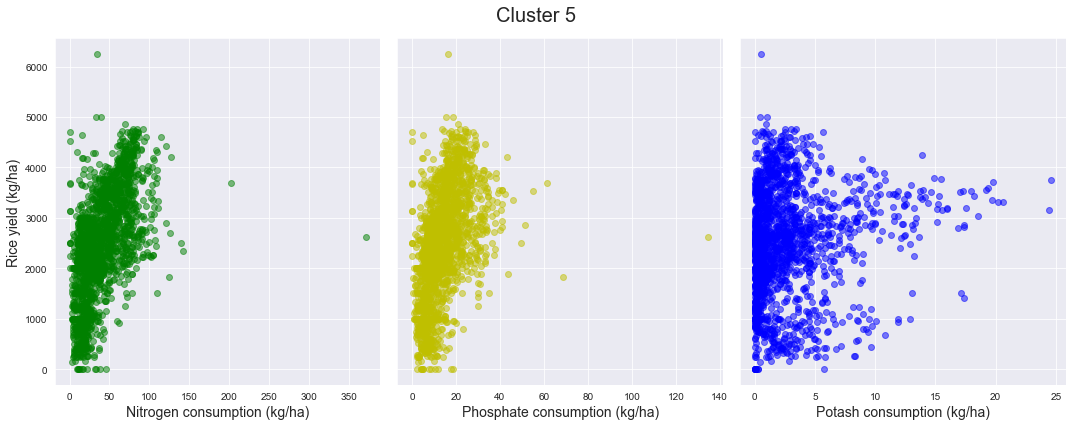


Plotting for cluster 6
No. of samples in cluster 6 = 280


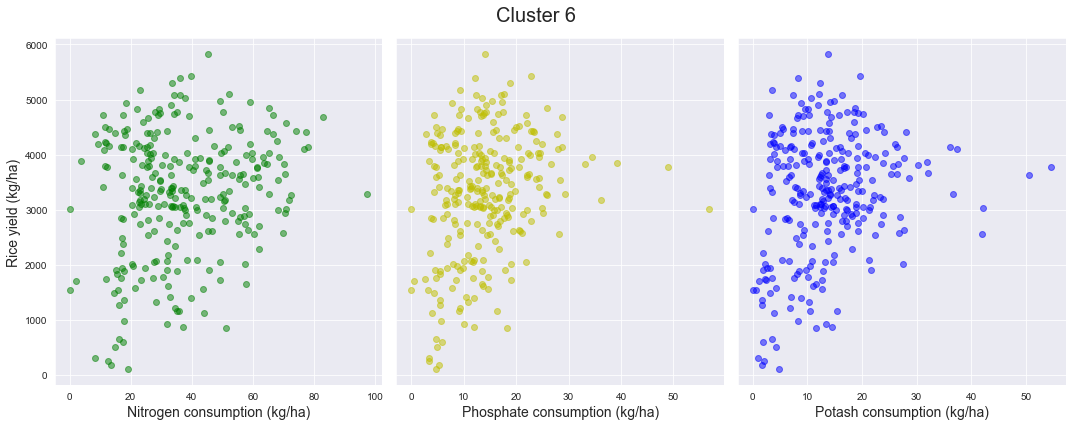

In [7]:
for i in range(1, N_clusters+1):
    print('\nPlotting for cluster %d'% (i))
    selection = df[df['Cluster']==i]
    print('No. of samples in cluster %d = %d'% (i, len(selection)))
    
    # Plotting
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6), tight_layout=True, sharey=True)
    # Axes 0: Rice yield (kg/ha) vs. nitrogen consumption (kg/ha)
    axes[0].scatter(x=selection['N_per_area'], y=selection['RICE.YIELD..kg.per.ha.'], c='g', alpha=0.5)
    axes[0].set_xlabel('Nitrogen consumption (kg/ha)', fontsize=14)
    axes[0].set_ylabel('Rice yield (kg/ha)', fontsize=14)
    # Axes 1: Rice yield (kg/ha) vs. phosphate consumption (kg/ha)
    axes[1].scatter(x=selection['P_per_area'], y=selection['RICE.YIELD..kg.per.ha.'], c='y', alpha=0.5)
    axes[1].set_xlabel('Phosphate consumption (kg/ha)', fontsize=14)
    # Axes 1: Rice yield (kg/ha) vs. potash consumption (kg/ha)
    axes[2].scatter(x=selection['K_per_area'], y=selection['RICE.YIELD..kg.per.ha.'], c='b', alpha=0.5)
    axes[2].set_xlabel('Potash consumption (kg/ha)', fontsize=14)
    # Title
    fig.suptitle('Cluster %d'% (i), fontsize=20)
    plt.show()
    

While the data are noisy, several of the above look linear or close to linear.

### Cluster-wise correlation plots

To guide our modeling, let's further check for correlations between fertilizer consumption and some environmental parameters. Non-zero correlations will be indicative of farming practices adopted in different clusters.

Cluster 1


<Figure size 720x576 with 0 Axes>

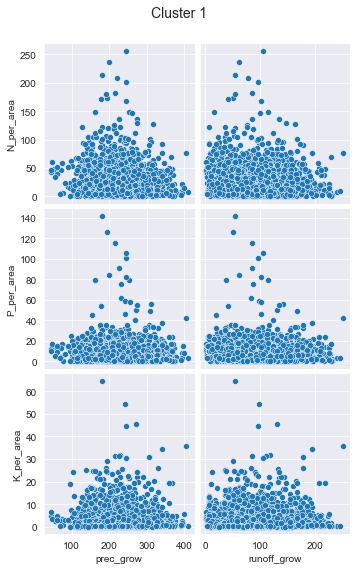

Cluster 2


<Figure size 720x576 with 0 Axes>

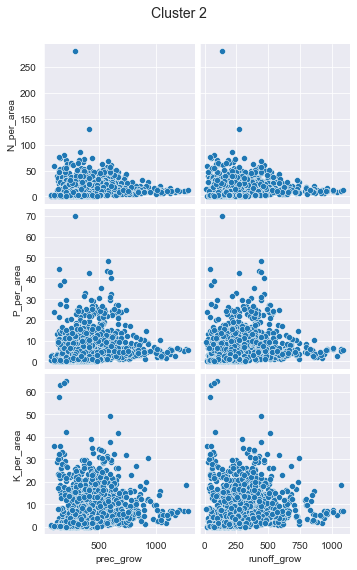

Cluster 3


<Figure size 720x576 with 0 Axes>

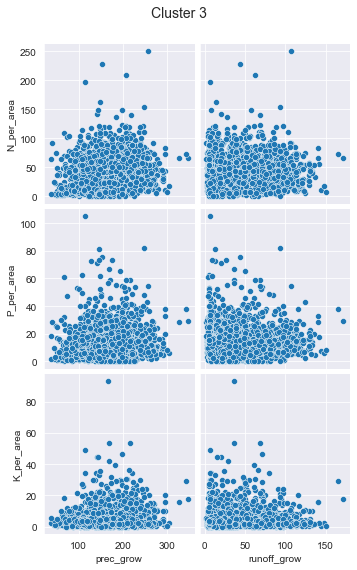

Cluster 4


<Figure size 720x576 with 0 Axes>

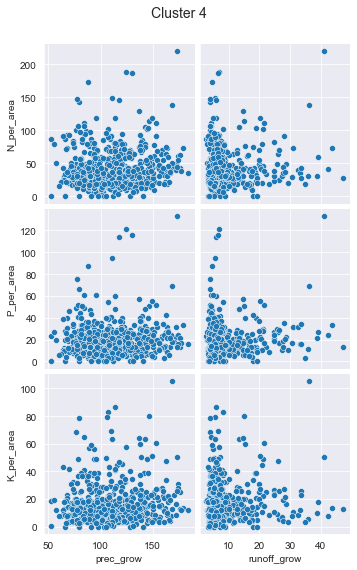

Cluster 5


<Figure size 720x576 with 0 Axes>

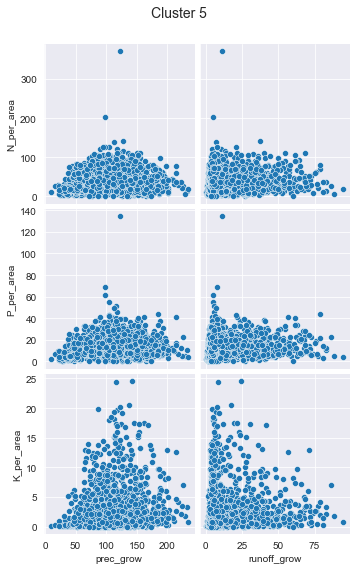

Cluster 6


<Figure size 720x576 with 0 Axes>

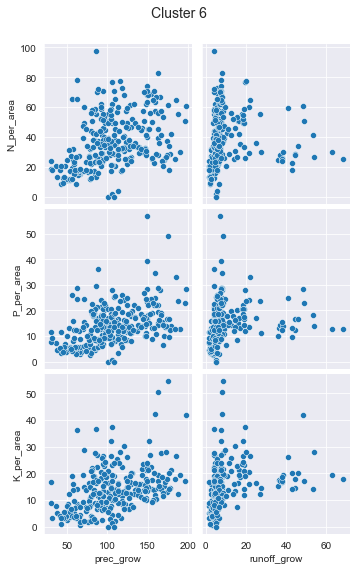

In [8]:
for i in range(1, N_clusters+1):
    selection = df[df['Cluster']==i]
    print('Cluster %d'% (i))
    
    
    fig = plt.figure(i, figsize=(10,8))
    ax = sns.pairplot(selection, x_vars=['prec_grow', 'runoff_grow'], 
                 y_vars=['N_per_area', 'P_per_area',  'K_per_area'])
    ax.fig.suptitle("Cluster %d"% (i), y=1.05, fontsize=14)
    plt.show()
    
    

### Correlation coefficients of `N_per_area` with `prec_grow` and `runoff_grow`:

In [9]:
for i in range(1, N_clusters+1):
    selection = df[df['Cluster']==i]
    print('Cluster %d'% (i))
    print(selection[['prec_grow', 'runoff_grow', 'N_per_area']].corr()['N_per_area'].sort_values()[:-1])
    print('\n')

Cluster 1
prec_grow     -0.055650
runoff_grow   -0.049971
Name: N_per_area, dtype: float64


Cluster 2
runoff_grow    0.046403
prec_grow      0.066680
Name: N_per_area, dtype: float64


Cluster 3
runoff_grow    0.038127
prec_grow      0.121947
Name: N_per_area, dtype: float64


Cluster 4
runoff_grow    0.093739
prec_grow      0.095857
Name: N_per_area, dtype: float64


Cluster 5
prec_grow     -0.000528
runoff_grow    0.037469
Name: N_per_area, dtype: float64


Cluster 6
runoff_grow    0.080135
prec_grow      0.377546
Name: N_per_area, dtype: float64




### Correlation coefficients of `P_per_area` with `prec_grow` and `runoff_grow`:

In [10]:
for i in range(1, N_clusters+1):
    selection = df[df['Cluster']==i]
    print('Cluster %d'% (i))
    print(selection[['prec_grow', 'runoff_grow', 'P_per_area']].corr()['P_per_area'].sort_values()[:-1])
    print('\n')

Cluster 1
prec_grow     -0.035928
runoff_grow    0.000027
Name: P_per_area, dtype: float64


Cluster 2
runoff_grow    0.130445
prec_grow      0.150326
Name: P_per_area, dtype: float64


Cluster 3
runoff_grow    0.030020
prec_grow      0.051648
Name: P_per_area, dtype: float64


Cluster 4
prec_grow      0.107684
runoff_grow    0.136728
Name: P_per_area, dtype: float64


Cluster 5
runoff_grow    0.030492
prec_grow      0.048014
Name: P_per_area, dtype: float64


Cluster 6
runoff_grow    0.199936
prec_grow      0.457106
Name: P_per_area, dtype: float64




### Correlation coefficients of `K_per_area` with `prec_grow` and `runoff_grow`:

In [11]:
for i in range(1, N_clusters+1):
    selection = df[df['Cluster']==i]
    print('Cluster %d'% (i))
    print(selection[['prec_grow', 'runoff_grow', 'K_per_area']].corr()['K_per_area'].sort_values()[:-1])
    print('\n')

Cluster 1
prec_grow      0.043612
runoff_grow    0.063432
Name: K_per_area, dtype: float64


Cluster 2
runoff_grow    0.148078
prec_grow      0.166420
Name: K_per_area, dtype: float64


Cluster 3
runoff_grow    0.010255
prec_grow      0.086029
Name: K_per_area, dtype: float64


Cluster 4
prec_grow      0.084685
runoff_grow    0.128080
Name: K_per_area, dtype: float64


Cluster 5
runoff_grow    0.019719
prec_grow      0.159581
Name: K_per_area, dtype: float64


Cluster 6
runoff_grow    0.353306
prec_grow      0.445918
Name: K_per_area, dtype: float64




From the above exercise, barring some notable excpetions (e.g., cluster 6), we note that NPK fertilizer consumption per unit area for most clusters is only weakly correlated with `prec_grow` and `runoff_grow`.